In [14]:
# Ion channel analysis --> Cluster analysis and miRNA targeting

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

#mirna_edges = pd.read_csv("mirna")
ion_channel = pd.read_csv("Ion_channels.csv", delimiter=";")
mirna_expression = pd.read_csv("mirna_edges.csv")
supercluster = pd.read_csv("end_supercluster_gene_analysis.csv")
mirna_traj = pd.read_csv("miR_superclustering.csv")

In [2]:
#makes text as text and increase matplotlib.pyplot fontsize
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

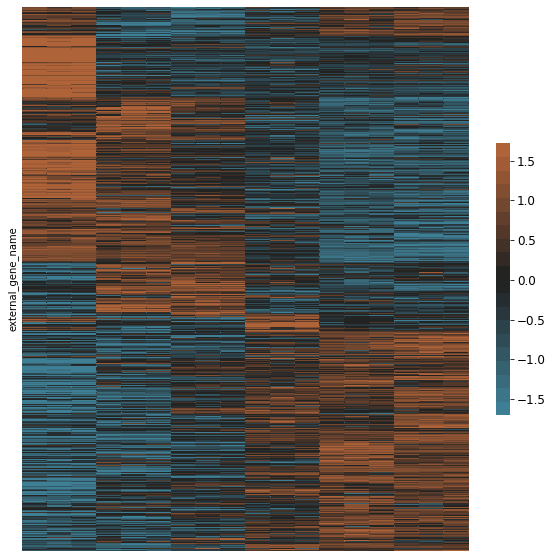

In [3]:
#make a heatmap of all clusters and genes
#visualize the heatmap
all_genes = supercluster.sort_values("diff_state").set_index(
    "external_gene_name"
).iloc[:, 3:-3]  # get the expression for each differentiation state

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(all_genes,
            cbar_kws={"shrink": 0.5},
            robust=True,
            annot=False,
            cmap=sns.diverging_palette(222, 30, l=50, n=20, center="dark"),
            xticklabels=False,
            yticklabels=False)
plt.savefig("heatmap_all_genes.pdf", quality=90, dpi=600, transparent=True)

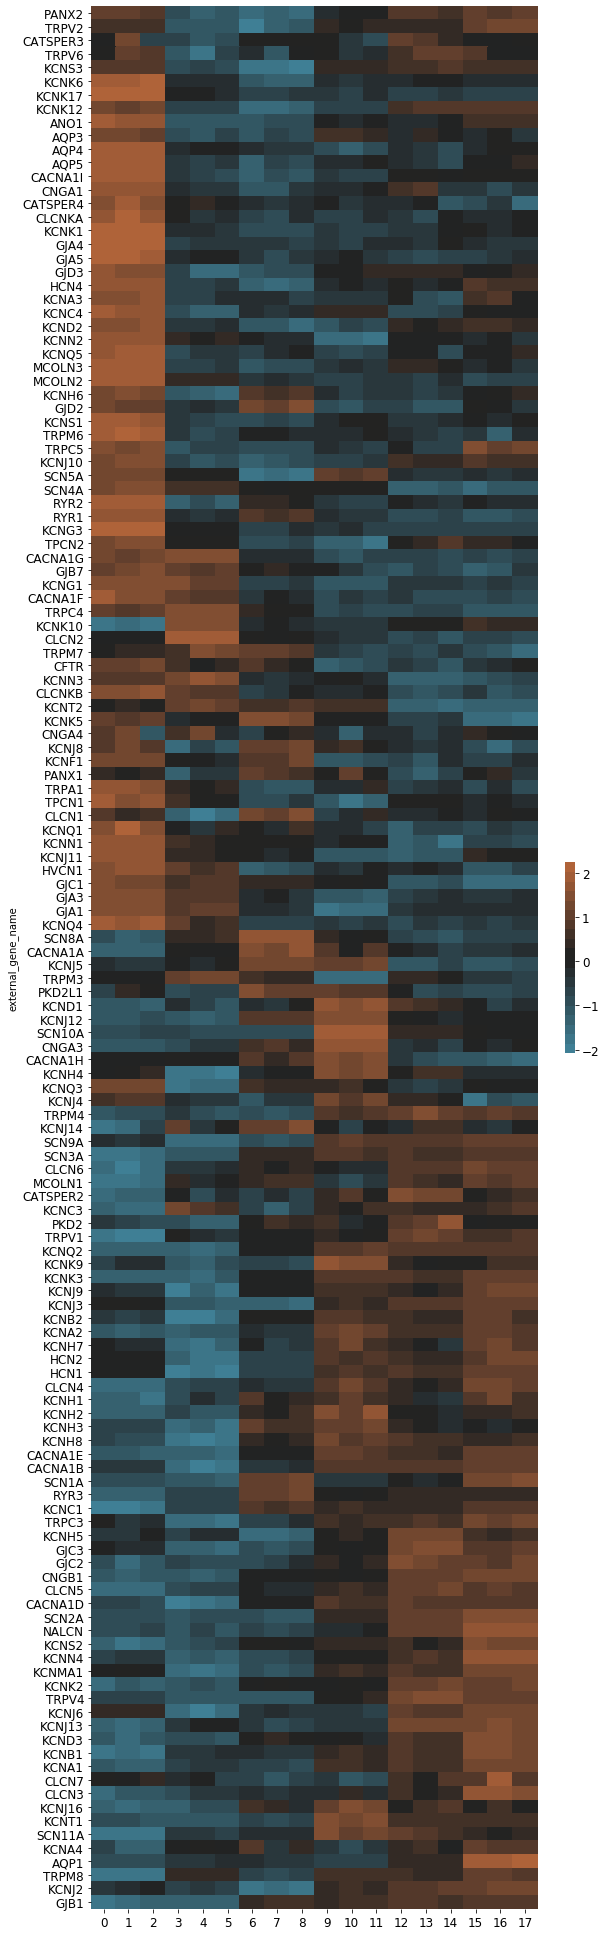

In [4]:
#make a heatmap of expresssed and curated ion-channels
ion_channel_expression = supercluster[supercluster["external_gene_name"].isin(
    ion_channel["ion_channel"].tolist())].set_index(
        "external_gene_name").sort_values("diff_state")
ion_channel_expression = ion_channel_expression.iloc[:, 3:-3]
fig, ax = plt.subplots(figsize=(10, 35))
sns.heatmap(ion_channel_expression,
            cbar_kws={"shrink": 0.1},
            cmap=sns.diverging_palette(222, 30, l=50, n=20, center="dark"))
plt.savefig("heatmap_ion_channels_new.svg",
            quality=90,
            transparent=True,
            dpi=600,
            bbox_inches="tight")

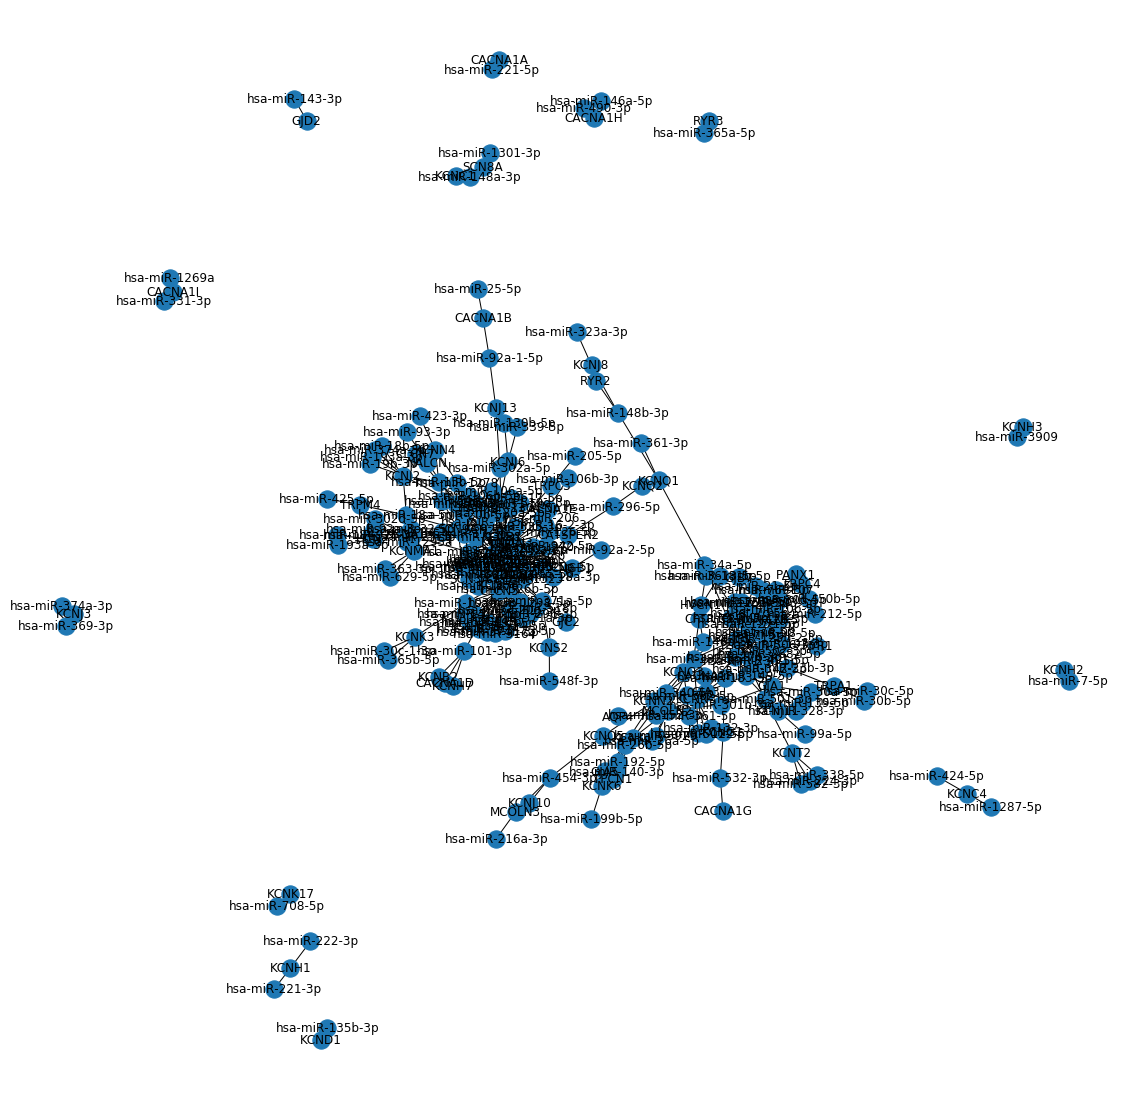

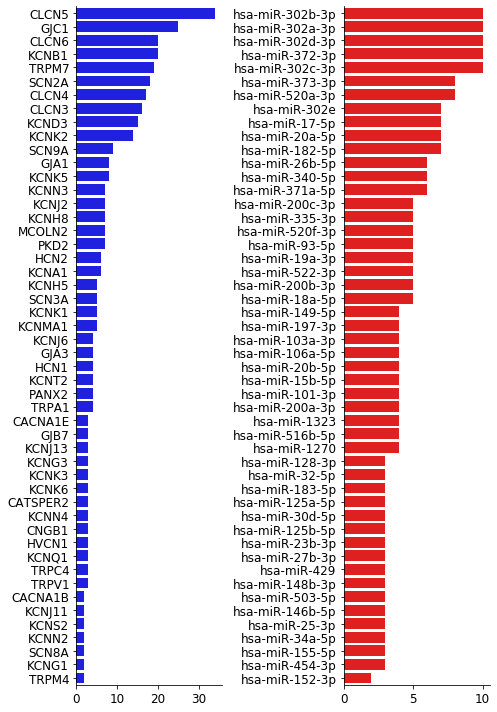

In [10]:
# mirna_targeting of ionchannels, but only interpretate ion-channels miRNA connection not ion channel:: ion channel connections
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['svg.fonttype'] = 'none'
ion_channel_target = mirna_expression[mirna_expression["gene_name"].isin(
    ion_channel["ion_channel"].tolist())]
ion_channel_target = ion_channel_target[
    (ion_channel_target["correlation"] <= -0.7)
    & (ion_channel_target["score"] > 70)]
ion_network = nx.from_pandas_edgelist(ion_channel_target, "gene_name", "mirna",
                                      "score")
fig, ax = plt.subplots(figsize=(20, 20))
nx.draw_spring(ion_network, with_labels=True)
nx.write_graphml(ion_network, "trial.graphml")
count_values = pd.DataFrame(
    ion_channel_target["mirna"].value_counts()).iloc[:50, :]
gene_count = pd.DataFrame(
    ion_channel_target["gene_name"].value_counts()).iloc[:50, :]
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 10))
sns.despine()
sns.barplot(data=gene_count.T, ax=ax[0], orient="h", color="blue")
sns.barplot(data=count_values.T, ax=ax[1], orient="h", color="red")
plt.tight_layout()
plt.savefig("target_ion_channels.svg",
            quality=90,
            dpi=600,
            transparent=True,
            bbox_inches="tight")

In [19]:
ion_channel_target_mirnas_noci = ion_channel_target[
    ion_channel_target["supercluster_mirna"].isin([1, 2])]["mirna"].tolist()
ion_channel_target_mirnas_pluri = ion_channel_target[
    ion_channel_target["supercluster_mirna"].isin([3, 4])]["mirna"].tolist()

In [20]:
df_gene_pluri = ion_channel_target[
    ion_channel_target["supercluster_gene"].isin(
        ["pluripotency", "early differentiation"])]["gene_name"].tolist()
df_gene_noci = ion_channel_target[ion_channel_target["supercluster_gene"].isin(
    ["nociceptor", "neural progenitor_late"])]["gene_name"].tolist()

In [21]:
#mirna trajectories
mirna_noci = mirna_traj[mirna_traj["Row.names"].isin(
    ion_channel_target_mirnas_noci)].set_index("Row.names").iloc[:, 1:-1]
mirna_pluri = mirna_traj[mirna_traj["Row.names"].isin(
    ion_channel_target_mirnas_pluri)].set_index("Row.names").iloc[:, 1:-1]

                           0         1         2         3         4  \
external_gene_name                                                     
CACNA1B            -0.485922 -0.541099 -0.503589 -1.602718 -1.936871   
CACNA1E            -1.127421 -1.028630 -1.294606 -1.219531 -1.403695   
CLCN4              -1.453340 -1.563791 -1.523664 -0.840590 -0.615218   
HCN1                0.018401  0.022027 -0.010400 -1.866057 -1.687790   
HCN2                0.047222 -0.130629 -0.093999 -1.316434 -1.824365   
KCNB2              -0.515949 -0.592308 -0.488321 -2.033886 -2.030653   
KCNJ3               0.216481  0.133075  0.027243 -1.154979 -1.111704   
KCNK3              -1.237848 -1.351535 -1.243280 -1.392145 -1.516636   
KCNQ2              -1.378492 -1.370633 -1.287857 -1.213399 -1.501976   
SCN3A              -1.670368 -1.704748 -1.610694 -1.063672 -1.118387   
SCN9A              -0.299514 -0.355487 -0.292804 -1.500480 -1.522024   
TRPC3               0.171445 -0.397510 -0.255777 -1.547205 -1.60

/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/maximilianzeidler/opt/anac

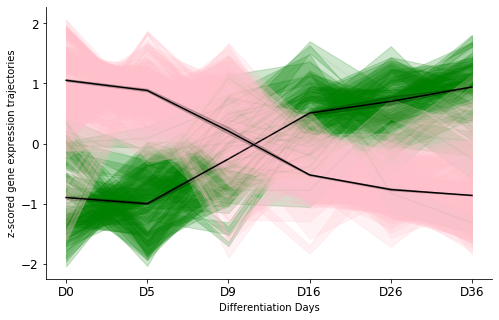

In [28]:
#detect the main trajectories of the miRNA and genes
columns = [
    "D0", "D0", "D0", "D5", "D5", "D5", "D9", "D9", "D9", "D16", "D16", "D16",
    "D26", "D26", "D26", "D36", "D36", "D36"
]

gene_noci = supercluster[supercluster["external_gene_name"].isin(
    df_gene_noci)].set_index("external_gene_name").iloc[:, 3:-3]
gene_pluri = supercluster[supercluster["external_gene_name"].isin(
    df_gene_pluri)].set_index("external_gene_name").iloc[:, 3:-3]
print(gene_noci)
gene_noci.columns = columns
gene_pluri.columns = columns

#mean trajectories for genes
mean_noci = gene_noci.mean(axis=0)
mean_pluri = gene_pluri.mean(axis=0)
palette_gene_noci = ["green"] * gene_noci.shape[0]
palette_gene_pluri = ["green"] * gene_pluri.shape[0]

#mean trajectories für mirnas
mirna_noci.columns = columns
mirna_pluri.columns = columns
mean_mirna_noci = mirna_noci.mean(axis=0)
mean_mirna_pluri = mirna_pluri.mean(axis=0)
palette_mirna_noci = ["pink"] * mirna_noci.shape[0]
palette_mirna_pluri = ["pink"] * mirna_pluri.shape[0]

#draw the lineplots with CI and averaged line
fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
sns.lineplot(data=gene_noci.T,
             palette=palette_gene_noci,
             dashes=False,
             sort=False,
             n_boot=400,
             alpha=0.05,
             legend=False)
sns.lineplot(data=mean_noci, c="black", sort=False)
sns.lineplot(data=mirna_pluri.T,
             palette=palette_mirna_pluri,
             dashes=False,
             sort=False,
             n_boot=400,
             alpha=0.05,
             legend=False)
sns.lineplot(data=mean_mirna_pluri, c="black", sort=False)
plt.ylabel("z-scored gene expression trajectories")
plt.xlabel("Differentiation Days")
plt.savefig("nociceptor_ionchannel_mirna.svg",
            quality=90,
            dpi=600,
            transparent=True)

(0.9721452539147503, 1.6698584771327327e-11)


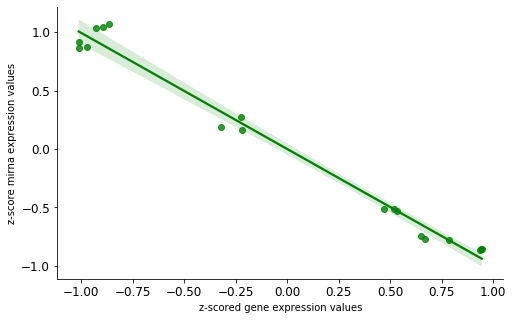

In [29]:
# correlation plot
# calculate noci correlation

from scipy import stats
noci_corr = stats.pearsonr(mean_noci, mean_mirna_noci)
print(noci_corr)

fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
sns.regplot(x=mean_noci, y=mean_mirna_pluri, color="green")
plt.xlabel("z-scored gene expression values")
plt.ylabel("z-score mirna expression values")
plt.savefig("nociceptor_correlation_ion.svg",
            quality=90,
            dpi=600,
            transparent=True)

/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/Users/maximilianzeidler/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/maximilianzeidler/opt/anac

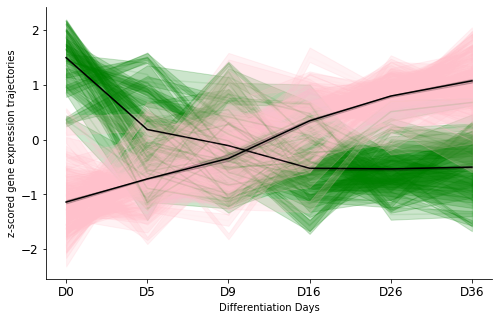

In [31]:
#draw the lineplots for the genes expressed in the pluripotent stage

fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
sns.lineplot(data=gene_pluri.T,
             palette=palette_gene_pluri,
             dashes=False,
             sort=False,
             n_boot=400,
             alpha=0.1,
             legend=False)
sns.lineplot(data=mean_pluri, c="black", sort=False)
sns.lineplot(data=mirna_noci.T,
             palette=palette_mirna_noci,
             dashes=False,
             sort=False,
             n_boot=400,
             alpha=0.05,
             legend=False)
sns.lineplot(data=mean_mirna_noci, c="black", sort=False)
plt.ylabel("z-scored gene expression trajectories")
plt.xlabel("Differentiation Days")
plt.savefig("pluripotency_mirna_ion.svg",
            quality=90,
            transparent=True,
            dpi=600)

(0.8550559797169787, 6.152607640637158e-06)


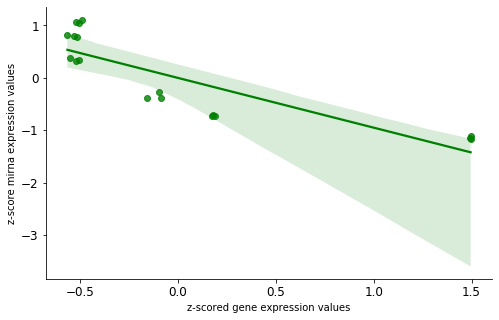

In [33]:
#correlation between gene and miRNA expression values for pluripotency

pluri_corr = stats.pearsonr(mean_pluri,
                            mean_mirna_pluri)  #pearson correlation (z-scored)

#draw the plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.despine()
sns.regplot(x=mean_pluri, y=mean_mirna_noci, color="green", robust=True)
plt.xlabel("z-scored gene expression values")
plt.ylabel("z-score mirna expression values")
plt.savefig("pluripotency_corr_ion.svg", quality=90, transparent=True, dpi=600)
print(pluri_corr)